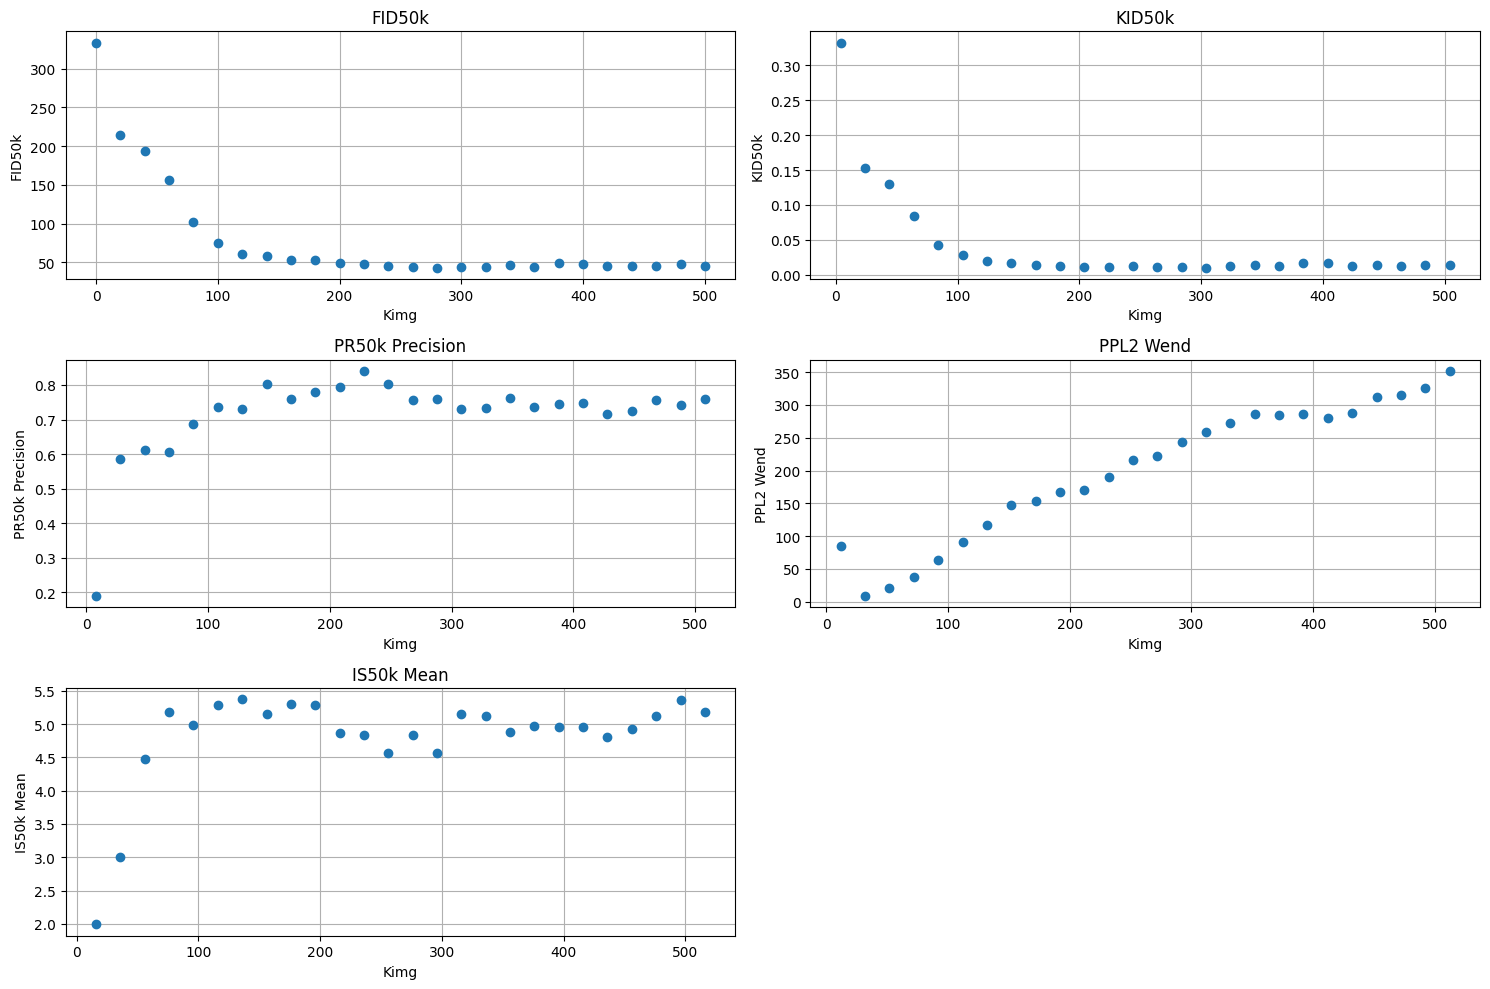

In [1]:
import re
import matplotlib.pyplot as plt
import json

# Load the file
file_name = "slurm-25284.out"

# Read the file
with open(file_name, 'r') as file:
    lines = file.readlines()

# Initialize data storage
kimg_values = []
fid50k_full = []
kid50k_full = []
pr50k3_full_precision = []
ppl2_wend = []
is50k_mean = []

# Extract data
for line in lines:
    # Extract kimg values
    tick_match = re.search(r'tick \d+\s+kimg (\d+\.\d+)', line)
    if tick_match:
        kimg_values.append(float(tick_match.group(1)))

    # Extract metric values from JSON-like lines
    try:
        data = json.loads(line)
        if isinstance(data, dict) and 'results' in data:
            fid50k_full.append(data['results'].get('fid50k_full'))
            kid50k_full.append(data['results'].get('kid50k_full'))
            pr50k3_full_precision.append(data['results'].get('pr50k3_full_precision'))
            ppl2_wend.append(data['results'].get('ppl2_wend'))
            is50k_mean.append(data['results'].get('is50k_mean'))
    except (json.JSONDecodeError, TypeError):
        continue

# Plotting the metrics
plt.figure(figsize=(15, 10))

# Plot each metric
metrics = {
    'FID50k': fid50k_full,
    'KID50k': kid50k_full,
    'PR50k Precision': pr50k3_full_precision,
    'PPL2 Wend': ppl2_wend,
    'IS50k Mean': is50k_mean
}

for i, (label, values) in enumerate(metrics.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(kimg_values[:len(values)], values, marker='o')
    plt.title(label)
    plt.xlabel('Kimg')
    plt.ylabel(label)
    plt.grid()

plt.tight_layout()
plt.show()